# Parameter Variation and Optimization

Create a machine with 4 poles:

In [1]:
machine = dict(
    name="PM-4-130",
    lfe=0.1,
    poles=4,
    outer_diam=0.13,
    bore_diam=0.07,
    inner_diam=0.015,
    airgap=0.0015,
     
    stator=dict(
        num_slots=12,
        rlength=1.0,
        statorRotor3=dict(
            slot_height=0.02,
            slot_h1=0.002,
            slot_h2=0.004,
            slot_r1=0.0,
            slot_r2=0.0,
            wedge_width1=0.0,
            wedge_width2=0.0,
            middle_line=0,
            tooth_width=0.009,
            slot_top_sh=0,
            slot_width=0.003)
    ),

    magnet=dict(
        magnetSector=dict(
            magn_num=1,
            magn_width_pct=0.6,
            magn_height=0.005,
            magn_shape=0.02,
            bridge_height=0,
            magn_type=2,
            condshaft_r=0.02,
            magn_ori=1,
            magn_rfe=0.0,
            bridge_width=0,
            magn_len=1)
    ),

    windings=dict(
        num_phases=3,
        num_wires=20,
        coil_span=3.0,
        num_layers=1)
)

Use a pm_sym_fast calculation at a rotor speed of 5000 1/min:

In [2]:
simulation = dict(
    speed=5000.0 / 60,
    calculationMode="pm_sym_fast",
    magn_temp=20.0,
    wind_temp=60,
    current=28.284,
    period_frac=6,
    angl_i_up=0.0)

Define the variation parameters with their ranges and number of steps:

In [3]:
decision_vars = [
        {"steps": 5, "bounds": [3e-3, 8e-3],
         "name": "stator.statorRotor3.slot_width",
         "label": "Slot Width/m"},
        {"steps": 5, "bounds": [0.72, 0.85],
         "name": "magnet.magnetSector.magn_width_pct",
         "label": "Rel. Magnet Width"},
        {"steps": 5, "bounds": [0.024, 0.0335],
         "name": "magnet.magnetSector.magn_shape",
         "label": "Magnet Shape/m"}
    ]

Define the objective parameters:

In [4]:
objective_vars = [
        {"name": "machine.torque",
         "label": "Load Torque/Nm"},
        {"name": "torque[0].ripple",
         "label": "Cogging Torque/Nm"},
        {"name": "torque[-1].ripple",
         "label": "Torque Ripple/Nm"}
    ]

Combine the objective and variation parameters and set the population size which is in this case the upper limit of the bucket size (ie. the number of parallel calculations):

In [5]:
parvardef = {
    "objective_vars": objective_vars,
    "population_size": 20,
    "decision_vars": decision_vars
}

Use logging to get a feedback during the calculation:

In [6]:
import logging
logging.basicConfig(level=logging.INFO,
                    format='%(asctime)s %(message)s')

Setup up an engine the drives the calculation. Here we chose a multi-core calculation: 

In [7]:
from femagtools.multiproc import Engine
engine = Engine()

Define the working directory:

In [8]:
import pathlib
workdir = pathlib.Path.home() / 'parvar2'
workdir.mkdir(parents=True, exist_ok=True)

Start the parameter variation with the total 125 FE calculations (duration on a Linux i7 laptop with 8 cores: 4min):

In [9]:
import femagtools.parstudy
parvar = femagtools.parstudy.Grid(workdir)
results = parvar(parvardef, machine, simulation, engine)

2021-09-13 11:17:16,405 Decision Vars: ['stator.statorRotor3.slot_width', 'magnet.magnetSector.magn_width_pct', 'magnet.magnetSector.magn_shape']
2021-09-13 11:17:16,406 bounds lower: (0.003, 0.72, 0.024)  upper: (0.008, 0.85, 0.0335)
2021-09-13 11:17:16,406 ........ 1 / 8 results: (0,)
2021-09-13 11:17:16,408 prepare [0.003 0.72  0.024]
2021-09-13 11:17:16,408 create new model 'PM-4-130'
2021-09-13 11:17:16,451 prepare [0.00425 0.72    0.024  ]
2021-09-13 11:17:16,451 create new model 'PM-4-130'
2021-09-13 11:17:16,453 prepare [0.0055 0.72   0.024 ]
2021-09-13 11:17:16,453 create new model 'PM-4-130'
2021-09-13 11:17:16,455 prepare [0.00675 0.72    0.024  ]
2021-09-13 11:17:16,455 create new model 'PM-4-130'
2021-09-13 11:17:16,457 prepare [0.008 0.72  0.024]
2021-09-13 11:17:16,458 create new model 'PM-4-130'
2021-09-13 11:17:16,460 prepare [0.003  0.7525 0.024 ]
2021-09-13 11:17:16,460 create new model 'PM-4-130'
2021-09-13 11:17:16,462 prepare [0.00425 0.7525  0.024  ]
2021-09-13 1

2021-09-13 11:18:13,369 Finished pid: 16354 return 0
2021-09-13 11:18:13,380 FEMAG /home/tar/parvar2/11: femag.fsl
2021-09-13 11:18:13,451 Finished pid: 16349 return 0
2021-09-13 11:18:13,452 Finished pid: 16355 return 0
2021-09-13 11:18:13,453 FEMAG /home/tar/parvar2/12: femag.fsl
2021-09-13 11:18:13,460 FEMAG /home/tar/parvar2/13: femag.fsl
2021-09-13 11:18:13,586 Finished pid: 16351 return 0
2021-09-13 11:18:13,588 FEMAG /home/tar/parvar2/14: femag.fsl
2021-09-13 11:18:13,596 Finished pid: 16352 return 0
2021-09-13 11:18:13,603 FEMAG /home/tar/parvar2/15: femag.fsl
2021-09-13 11:18:28,419 Finished pid: 16373 return 0
2021-09-13 11:18:28,421 FEMAG /home/tar/parvar2/16: femag.fsl
2021-09-13 11:18:28,444 Finished pid: 16368 return 0
2021-09-13 11:18:28,763 Finished pid: 16378 return 0
2021-09-13 11:18:29,307 Finished pid: 16383 return 0
2021-09-13 11:18:29,398 Finished pid: 16392 return 0
2021-09-13 11:18:29,398 Finished pid: 16403 return 0
2021-09-13 11:18:29,456 Finished pid: 16400 r

2021-09-13 11:19:14,603 create new model 'PM-4-130'
2021-09-13 11:19:14,605 prepare [0.003   0.7525  0.02875]
2021-09-13 11:19:14,606 create new model 'PM-4-130'
2021-09-13 11:19:14,607 prepare [0.00425 0.7525  0.02875]
2021-09-13 11:19:14,607 create new model 'PM-4-130'
2021-09-13 11:19:14,609 prepare [0.0055  0.7525  0.02875]
2021-09-13 11:19:14,609 create new model 'PM-4-130'
2021-09-13 11:19:14,611 prepare [0.00675 0.7525  0.02875]
2021-09-13 11:19:14,611 create new model 'PM-4-130'
2021-09-13 11:19:14,614 prepare [0.008   0.7525  0.02875]
2021-09-13 11:19:14,616 create new model 'PM-4-130'
2021-09-13 11:19:14,621 prepare [0.003   0.785   0.02875]
2021-09-13 11:19:14,623 create new model 'PM-4-130'
2021-09-13 11:19:14,625 prepare [0.00425 0.785   0.02875]
2021-09-13 11:19:14,625 create new model 'PM-4-130'
2021-09-13 11:19:14,627 prepare [0.0055  0.785   0.02875]
2021-09-13 11:19:14,627 create new model 'PM-4-130'
2021-09-13 11:19:14,629 prepare [0.00675 0.785   0.02875]
2021-09-13

2021-09-13 11:19:54,575 Finished pid: 16691 return 0
2021-09-13 11:19:54,592 FEMAG /home/tar/parvar2/16: femag.fsl
2021-09-13 11:19:55,459 Finished pid: 16696 return 0
2021-09-13 11:19:55,528 Finished pid: 16715 return 0
2021-09-13 11:19:55,552 Finished pid: 16710 return 0
2021-09-13 11:19:55,572 Finished pid: 16721 return 0
2021-09-13 11:19:55,596 Finished pid: 16716 return 0
2021-09-13 11:19:55,680 Finished pid: 16709 return 0
2021-09-13 11:19:55,790 Finished pid: 16726 return 0
2021-09-13 11:19:59,113 Finished pid: 16732 return 0
2021-09-13 11:19:59,115 Elapsed time 21 s Status ['C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C']
2021-09-13 11:19:59,116 Reading /home/tar/parvar2/0/PM-4-130_001.BATCH
2021-09-13 11:19:59,124 Reading /home/tar/parvar2/1/PM-4-130_001.BATCH
2021-09-13 11:19:59,128 Reading /home/tar/parvar2/2/PM-4-130_001.BATCH
2021-09-13 11:19:59,134 Reading /home/tar/parvar2/3/PM-4-130_001.BATCH
2021-09-13 11:19:59,141 Reading /home/tar/

2021-09-13 11:20:24,940 prepare [0.00425 0.785   0.0335 ]
2021-09-13 11:20:24,941 create new model 'PM-4-130'
2021-09-13 11:20:24,943 prepare [0.0055 0.785  0.0335]
2021-09-13 11:20:24,943 create new model 'PM-4-130'
2021-09-13 11:20:24,945 prepare [0.00675 0.785   0.0335 ]
2021-09-13 11:20:24,946 create new model 'PM-4-130'
2021-09-13 11:20:24,948 prepare [0.008  0.785  0.0335]
2021-09-13 11:20:24,949 create new model 'PM-4-130'
2021-09-13 11:20:24,951 prepare [0.003  0.8175 0.0335]
2021-09-13 11:20:24,952 create new model 'PM-4-130'
2021-09-13 11:20:24,955 prepare [0.00425 0.8175  0.0335 ]
2021-09-13 11:20:24,956 create new model 'PM-4-130'
2021-09-13 11:20:24,959 prepare [0.0055 0.8175 0.0335]
2021-09-13 11:20:24,960 create new model 'PM-4-130'
2021-09-13 11:20:24,969 prepare [0.00675 0.8175  0.0335 ]
2021-09-13 11:20:24,971 create new model 'PM-4-130'
2021-09-13 11:20:25,035 Started 17
2021-09-13 11:20:25,029 FEMAG /home/tar/parvar2/2: femag.fsl
2021-09-13 11:20:25,028 FEMAG /home/

Print the results in table form:

In [10]:
import numpy as np
x = results['x']
f = results['f']

# print header
print(' '.join(['{:15}'.format(s)
                for s in [d['label']
                          for d in parvardef['decision_vars']] +
                [o['label']
                 for o in parvardef['objective_vars']]]))
print()
# print values in table format
for l in np.vstack((x, f)).T:
    print(' '.join(['{:15.4f}'.format(x) for x in l]))

Slot Width/m    Rel. Magnet Width Magnet Shape/m  Load Torque/Nm  Cogging Torque/Nm Torque Ripple/Nm

         0.0030          0.7200          0.0240         13.7317          0.1173          0.4150
         0.0043          0.7200          0.0240         13.5960          0.2254          0.5200
         0.0055          0.7200          0.0240         13.3981          0.3091          0.6540
         0.0067          0.7200          0.0240         13.1605          0.4465          0.7570
         0.0080          0.7200          0.0240         12.8559          0.5656          0.9200
         0.0030          0.7525          0.0240         13.8450          0.0959          0.2270
         0.0043          0.7525          0.0240         13.7096          0.1379          0.3010
         0.0055          0.7525          0.0240         13.5181          0.1521          0.3630
         0.0067          0.7525          0.0240         13.2720          0.1861          0.3890
         0.0080          0.7525   

The next step will be the creation of the pareto sets. Before doing that we must define the optimization criteria. We want all values be minimize with the exception of the torque:

In [11]:
parvardef['objective_vars'][0]['sign']=-1

Now we are ready to create the pareto sets:

In [12]:
import femagtools.moproblem
import femagtools.moo

size = np.shape(f)[1]
prob = femagtools.moproblem.FemagMoProblem(parvardef['decision_vars'],
                                           parvardef['objective_vars'])

pop = femagtools.moo.Population(prob, size)
signs = [o.get('sign', 1)
         for o in parvardef['objective_vars']]
pop.populate(np.array(x).T, np.array(f), signs)
                               
px = pop.get_ranked_decisions()
po = pop.get_ranked_objectives(signs)
#
fp = dict()
xp = dict()
for k in po:
    #print("k {} len {}".format(k, len(pareto[k])))
    fp[k] = np.array(po[k]).T
    xp[k] = np.array(px[k]).T

for k in xp:
    xp[k] = [xp[k][0]*1e3, xp[k][1], xp[k][2]*1e3]

2021-09-13 11:20:56,512 Decision Vars: ['stator.statorRotor3.slot_width', 'magnet.magnetSector.magn_width_pct', 'magnet.magnetSector.magn_shape']
2021-09-13 11:20:56,513 bounds lower: (0.003, 0.72, 0.024)  upper: (0.008, 0.85, 0.0335)


Show the results of the pareto front

In [13]:
np.concatenate((np.array(xp[0]), fp[0])).T

array([[ 3.      ,  0.785   , 24.      , 13.9274  ,  0.073814,  0.142   ],
       [ 4.25    ,  0.785   , 24.      , 13.7949  ,  0.108203,  0.14    ],
       [ 3.      ,  0.85    , 24.      , 13.9744  ,  0.074298,  0.184   ],
       [ 3.      ,  0.72    , 26.375   , 14.3701  ,  0.168469,  0.621   ],
       [ 3.      ,  0.785   , 26.375   , 14.6945  ,  0.27715 ,  0.41    ],
       [ 3.      ,  0.8175  , 26.375   , 14.7971  ,  0.193612,  0.529   ],
       [ 3.      ,  0.85    , 26.375   , 14.8044  ,  0.179593,  0.542   ],
       [ 3.      ,  0.72    , 28.75    , 14.9065  ,  0.29331 ,  0.806   ],
       [ 3.      ,  0.7525  , 28.75    , 15.137   ,  0.5899  ,  0.697   ],
       [ 3.      ,  0.785   , 28.75    , 15.3271  ,  0.65055 ,  0.757   ],
       [ 3.      ,  0.8175  , 28.75    , 15.4751  ,  0.51346 ,  0.958   ],
       [ 3.      ,  0.85    , 28.75    , 15.492   ,  0.48529 ,  0.987   ],
       [ 3.      ,  0.72    , 31.125   , 15.353   ,  0.45095 ,  1.      ],
       [ 3.      ,  0.785

Display a 3D scatter plot with all results and the pareto front:

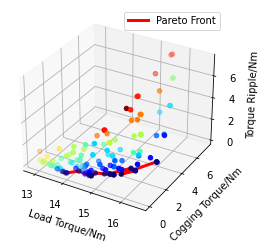

In [14]:
import matplotlib.pyplot as pl
import matplotlib.colors
import matplotlib.cm
import mpl_toolkits.mplot3d as mpl

cm = pl.get_cmap('jet')
cNorm = matplotlib.colors.Normalize(vmin=0, vmax=max(fp.keys()))
scalarMap = matplotlib.cm.ScalarMappable(norm=cNorm, cmap=cm)

fig = pl.figure()
ax = fig.add_subplot(111, projection='3d')
for k in fp:
    ax.scatter(fp[k][0], fp[k][1], fp[k][2], color=scalarMap.to_rgba(k))
ax.plot(fp[0][0], fp[0][1], fp[0][2],
        color='red', linewidth=3, label='Pareto Front')
ax.set_xlabel(parvardef['objective_vars'][0]['label'])
ax.set_ylabel(parvardef['objective_vars'][1]['label'])
ax.set_zlabel(parvardef['objective_vars'][2]['label'])

pl.legend()
pl.show()

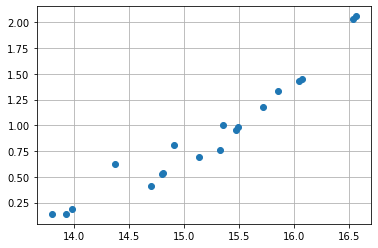

In [15]:
pl.plot(fp[0][0], fp[0][2], 'o')
pl.grid()

With multi objective optimization

In [16]:
import femagtools.opt
import femagtools.docker

workdir = pathlib.Path.home() / 'opti'

parvardef['population_size'] = 32

parvardef['decision_vars'][0]['desc'] = 'Slot width/mm' 
parvardef['decision_vars'][1]['desc'] = 'rel. Magn. width' 
parvardef['decision_vars'][2]['desc'] = 'Magn. Shape/mm' 
parvardef['objective_vars'][0]['desc'] = 'Load Torque/Nm' 
parvardef['objective_vars'][1]['desc'] = 'Cogging Torque/Nm' 
parvardef['objective_vars'][2]['desc'] = 'Torque Ripple/Nm' 

engine = femagtools.docker.Engine(num_threads=9, port=5555)
opt = femagtools.opt.Optimizer(workdir, magnetizingCurves=dict(), magnetMat=dict())
num_generations = 3
results = opt.optimize(num_generations, parvardef, machine, simulation, engine)

2021-09-13 11:20:56,975 Decision Vars: ['stator.statorRotor3.slot_width', 'magnet.magnetSector.magn_width_pct', 'magnet.magnetSector.magn_shape']
2021-09-13 11:20:56,976 bounds lower: (0.003, 0.72, 0.024)  upper: (0.008, 0.85, 0.0335)
2021-09-13 11:20:56,978 Optimize x:3 f:3 generations:3 population size:32
2021-09-13 11:20:56,979 Generation 0
2021-09-13 11:20:56,980 create new model 'PM-4-130'
2021-09-13 11:20:57,027 create simulation 'pm_sym_fast'
2021-09-13 11:20:57,039 create new model 'PM-4-130'
2021-09-13 11:20:57,040 create simulation 'pm_sym_fast'
2021-09-13 11:20:57,043 create new model 'PM-4-130'
2021-09-13 11:20:57,048 create simulation 'pm_sym_fast'
2021-09-13 11:20:57,052 create new model 'PM-4-130'
2021-09-13 11:20:57,053 create simulation 'pm_sym_fast'
2021-09-13 11:20:57,055 create new model 'PM-4-130'
2021-09-13 11:20:57,056 create simulation 'pm_sym_fast'
2021-09-13 11:20:57,058 create new model 'PM-4-130'
2021-09-13 11:20:57,059 create simulation 'pm_sym_fast'
2021-0

2021-09-13 11:21:15,423 Reading /home/tar/opti/29/PM-4-130_001.BATCH
2021-09-13 11:21:15,427 Reading /home/tar/opti/30/PM-4-130_001.BATCH
2021-09-13 11:21:15,431 Reading /home/tar/opti/31/PM-4-130_001.BATCH
2021-09-13 11:21:15,437 Generation: 0
rank torque    ripple    ripple     slot_width  magn_width_pctmagn_shape  
1     -13.97      0.30      0.40       0.0052    0.7649    0.0251
0     -15.76      1.35      1.57       0.0040    0.8218    0.0302
4     -14.70      2.41      2.45       0.0072    0.7937    0.0290
1     -13.33      0.24      0.32       0.0071    0.8082    0.0241
0     -16.01      2.71      2.72       0.0045    0.8080    0.0320
2     -14.54      1.09      1.24       0.0063    0.8307    0.0272
1     -14.95      0.91      1.08       0.0049    0.8175    0.0277
0     -15.84      2.28      2.32       0.0047    0.8423    0.0311
2     -14.94      0.92      1.39       0.0055    0.7323    0.0302
1     -15.61      1.89      1.95       0.0043    0.7711    0.0311
1     -15.17      0.

2021-09-13 11:21:27,864 upload /home/tar/opti/27/sin_4p.poc --> sin_4p.poc
2021-09-13 11:21:27,912 upload /home/tar/opti/28/sin_4p.poc --> sin_4p.poc
2021-09-13 11:21:27,913 upload /home/tar/opti/29/sin_4p.poc --> sin_4p.poc
2021-09-13 11:21:27,970 upload /home/tar/opti/30/sin_4p.poc --> sin_4p.poc
2021-09-13 11:21:27,975 upload /home/tar/opti/31/sin_4p.poc --> sin_4p.poc
2021-09-13 11:21:33,087 Reading /home/tar/opti/0/PM-4-130_001.BATCH
2021-09-13 11:21:33,091 Reading /home/tar/opti/1/PM-4-130_001.BATCH
2021-09-13 11:21:33,095 Reading /home/tar/opti/2/PM-4-130_001.BATCH
2021-09-13 11:21:33,099 Reading /home/tar/opti/3/PM-4-130_001.BATCH
2021-09-13 11:21:33,103 Reading /home/tar/opti/4/PM-4-130_001.BATCH
2021-09-13 11:21:33,106 Reading /home/tar/opti/5/PM-4-130_001.BATCH
2021-09-13 11:21:33,110 Reading /home/tar/opti/6/PM-4-130_001.BATCH
2021-09-13 11:21:33,115 Reading /home/tar/opti/7/PM-4-130_001.BATCH
2021-09-13 11:21:33,119 Reading /home/tar/opti/8/PM-4-130_001.BATCH
2021-09-13 11

2021-09-13 11:21:33,294 create new model 'PM-4-130'
2021-09-13 11:21:33,295 create simulation 'pm_sym_fast'
2021-09-13 11:21:33,296 create new model 'PM-4-130'
2021-09-13 11:21:33,297 create simulation 'pm_sym_fast'
2021-09-13 11:21:33,298 create new model 'PM-4-130'
2021-09-13 11:21:33,299 create simulation 'pm_sym_fast'
2021-09-13 11:21:33,300 Request 9 workers on 127.0.0.1 (num tasks 32)
2021-09-13 11:21:33,316 upload /home/tar/opti/1/sin_4p.poc --> sin_4p.poc
2021-09-13 11:21:33,316 upload /home/tar/opti/6/sin_4p.poc --> sin_4p.poc
2021-09-13 11:21:33,317 upload /home/tar/opti/2/sin_4p.poc --> sin_4p.poc
2021-09-13 11:21:33,318 upload /home/tar/opti/4/sin_4p.poc --> sin_4p.poc
2021-09-13 11:21:33,318 upload /home/tar/opti/0/sin_4p.poc --> sin_4p.poc
2021-09-13 11:21:33,319 upload /home/tar/opti/7/sin_4p.poc --> sin_4p.poc
2021-09-13 11:21:33,321 upload /home/tar/opti/5/sin_4p.poc --> sin_4p.poc
2021-09-13 11:21:33,357 upload /home/tar/opti/8/sin_4p.poc --> sin_4p.poc
2021-09-13 11:

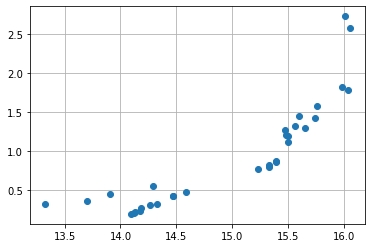

In [17]:
pl.plot([t for t in results['f'][0] if t>0], 
        [p for p in results['f'][2] if p>0], 'o')
pl.grid()